<a href="https://colab.research.google.com/github/alcarvalhox/Projeto-Eddy-Current/blob/master/Analise_SVTS_Alexandre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregar Pacotes

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import datetime
from pytz import timezone
import math
import os
import sys
import pandas as pd
from prettytable import PrettyTable
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
from numpy import *
import numpy as np
import scipy.io
from scipy import signal
from scipy.signal import medfilt
import seaborn as sns
import pywt
import csv
from PIL import Image
import argparse
import cv2 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from keras.preprocessing.image import img_to_array
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
import pylab as pl
from google.colab import files
from google.colab.patches import cv2_imshow
from IPython.display import Image, display


################################################
from google.colab import drive
drive.mount("/content/drive/")

#################################################
try:
  path = '/content/drive/My Drive/Projeto Eddy Current/Arquivos Tiago'
  os.chdir(path)
  print("\nCaminho configurado!")
except:
  print("Erro ao carregar diretorio no drive. Usado para drive compartilhado")



#################################################
print("\nPacotes carregados!")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).

Caminho configurado!

Pacotes carregados!
10-09-2020 07:46:37


# Classes 

## Classe Arquivos

In [13]:
# -*- coding: utf-8 -*-
import sys 
import os
import datetime
from pytz import timezone
import csv


#########################################################
## Classe carregar arquivos 
##                                             
## Tiago Araujo                                13-08-2020
#########################################################
class ClasseEditarArquivo:

  def __init__(self):
    pass

#########################################################
# Função:  
# Parametros: 
#########################################################
  def getLine(self, Matrix, NumLine): 
    try:
        return Matrix[NumLine]
    except Exception as e:
        print("Erro no metodo getLine: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);  

#########################################################
# Função:  
# Parametros: 
#########################################################
  def getColumn (self, Matrix, NumColumn): 
    try:
      column = [];
      for row in Matrix:
        column.append(row[NumColumn]);   
      return column;
    except Exception as e:
        print("Erro no metodo getColumn: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   


#########################################################
# Função:  Carega dado arquivo externo
# Parametros: 
# Path = diretório 
# File = nome do arquivo com a extensão. Ex. "dado.txt"
# Delimiter= 1=" ", 2="\t" ou uma string com o delimitador 
#########################################################
  def openFile(self, Path, File, Delimiter): 
    try:
      caminho = Path + "/" +File;
        
      #definei o caracter de separação
      if (Delimiter == 1):        # espaço simples
        delimiter = ' '
      elif (Delimiter == 2):      # tabulação
        delimiter = '\t'
      else:                       # delimitador especificado
        delimiter = Delimiter

      # abrir arquivo
      array = [];
      with open(caminho, 'r') as f:
        row1 = [float(x) for x in next(f).split(delimiter)]
        rows = [[float(x) for x in line.split(delimiter)] for line in f]

      # concatenar dados
      array.append(row1)
      for linha in range(len(rows)):
        array.append(rows[linha])

      return array;
    except Exception as e:
        print("Erro no metodo openFile: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   

#########################################################
# Função:  Salva matriz de dados em arquivo txt
# Parametros: 
# Matriz = dados a seram exportado, 
# Path = diretório onde será armazenado 
# FileName nome do arquivo com a extesão: "dado.txt" 
# Delimiter = espaçamento entre colunas. 1=espaço simples
#########################################################
  def writeFileTXT(self, Matriz, Path, FileName, Delimiter): 
    try:
      caminho = Path + "/" + FileName;
      size = self.getSize(Matriz);      

      #definei o caracter de separação
      if (Delimiter == 1):        # espaço simples
        dlm = ' '
      elif (Delimiter == 2):      # tabulação
        dlm = '\t'
      else:                       # delimitador especificado
        dlm = Delimiter

      #  abre arquivo para escrita
      with open(caminho,"w") as txt_file:
        if (size[0] > 1):
          csv.writer(txt_file, delimiter = dlm).writerows(Matriz);
        else:
          csv.writer(txt_file, delimiter = dlm).writerow(Matriz);

      print("Arquivo exportado: Linhas = %d e Colunas = %d"% (size[0], size[1]))
      print("Local: ", caminho)

      txt_file.close()  
    except Exception as e:
        print("Erro no metodo writeFileTXT: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e); 




#########################################################
# Função:  Retorna um vetor correspondente à coluna selecionada
# Parametros: 
# Path = diretório 
# File = nome do arquivo com a extensão. Ex. "dado.txt"
# Delimiter= 1=" ", 2="\t" ou uma string com o delimitador 
# Column = número da coluna a ser importada
#########################################################
  def openFileColumn(self, Path, File, Delimiter, Column): 
    try:      
      arquivo  = self.openFile(Path, File, Delimiter);
      Vetor = [];
      size = self.getSize(arquivo);
      if (size[1] >= Column):
        Vetor.append(self.getColumn(arquivo, Column));
      else:
        print("Arquivo possui apenas ", size[1], " colunas!")
      return Vetor;
    except Exception as e:
      print("Erro no metodo openFileColumn: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   

 #########################################################
# Função:  Retorna um vetor correspondente à linha selecionada
# Parametros: 
# Path = diretório 
# File = nome do arquivo com a extensão. Ex. "dado.txt"
# Delimiter= 1=" ", 2="\t" ou uma string com o delimitador 
# Column = número da coluna a ser importada
#########################################################
  def openFileLine(self, Path, File, Delimiter, Line): 
    try:      
      arquivo  = self.openFile(Path, File, Delimiter);
      Vetor = [];
      size = self.getSize(arquivo);
      if (size[0] >= Line):
        Vetor.append(self.getLine(arquivo, Line));
      else:
        print("Arquivo possui apenas ", size[0], " Linhas!")
      return Vetor;
    except Exception as e:
      print("Erro no metodo openFileLine: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);             

#########################################################
# Função: Retorna o tamnho da matriz [linhas: colunas] 
# Parametros: 
#########################################################
  def getSize(self, Matrix): 
    try:
      size = [];

      NumL = 0
      if (type(Matrix) is list):
        for elementos in Matrix:
          NumL += 1
      else:
        NumL = 1;

      NumC = 0
      if (type(Matrix[0]) is list):
        for elementos in Matrix[0]:
          NumC += 1
      else:
        NumC = NumL;
        NumL = 1;

      size.append(NumL)
      size.append(NumC)
      print("getSize = %d x %d" % (size[0], size[1]))
      return size
    except Exception as e:
        print("Erro no metodo getSize: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   


#########################################################
 # Função:  retorna o diretório do script executado
 # Parametros: 
 #########################################################
  def getCurrentDirectory(self):
    try:
        currentDirectory = os.getcwd()
        print(currentDirectory)
        return currentDirectory
    except Exception as e:
        print("Erro no metodo getCurrentDirectory: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
        print(e); 

#########################################################
# Função:  Retorna o diretorio anterio. Ex cd..
# Parametros: 
#########################################################
  def getDiretorioAnterior(self, CurrentPath): 
    try:
      PathPrevius = os.path.abspath(os.path.join(CurrentPath, os.pardir))
      return PathPrevius
    except Exception as e:
      print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e); 




 #########################################################
 # Função: Cria uma pasta  
 # Parametros: 
 #########################################################
  def criarPasta(self, Path, FolderName): 
    try:     
      caminho = Path + "/" + FolderName;  
      if not os.path.exists(caminho):
        os.makedirs(caminho)        
      else:
        print("\nPasta já existente ou diretório errado!")
        print(caminho)
      return caminho
    except Exception as e:
      print("Erro no metodo criarPasta: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e); 

 #########################################################
 # Função:  
 # Parametros: 
 # Path = diretório  
 # Extetion = extenção. Ex: "txt"
 #########################################################
  def getListaArquivos(self, Path, Extetion): 
    try:
      text_files = [f for f in os.listdir(Path) if f.endswith(Extetion)]
      print("\nLista de arquivos com extensão: ", Extetion)
      for file in range(len(text_files)):
        print(text_files[file])

      return text_files
    except Exception as e:
      print("Erro no metodo getListaArquivos: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e); 




#########################################################
# Função:  ## https://www.python-course.eu/python3_formatted_output.php
# Parametros: 
#########################################################
  def PrintFormat(self): 
    try:
      aa = 1234.56345456687
      bb = 3.131516174565678345345
      print("=======================PrintFormat=======================")
      print("O numero %d e o %1.2f" % (aa, bb))
      print("%10.3e"% (bb))
      print("%10.3E"% (bb))
      print("%10o"% (21))
      print("%10.3o"% (21))
      print("%10.5o"% (25))
      print("%5x"% (47))      
      print("%5.4x"% (47))
      print("%5.4X"% (47))
      print("Only one percentage sign: %% " % ())

    except Exception as e:
        print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
        print(e); 

# #########################################################
# # Função:  
# # Parametros: 
# #########################################################
#   def Modelo(self, var1, var2, var3): 
#     try:
#         return 1
#     except Exception as e:
#         print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
#         print(e); 




print("ClasseEditarArquivo carregada!")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))




ClasseEditarArquivo carregada!
10-09-2020 07:46:37


## Classe Plotes

In [14]:
# -*- coding: utf-8 -*-
import sys 
import datetime
from pytz import timezone
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)



#########################################################
## Classe desenvolvida gerenciar os plotes 
##                                             
## Tiago Araujo                                13-08-2020
#########################################################
class ClassePlote(ClasseEditarArquivo):
  
  def __init__(self):
    self.__CurrentFigure = 0;
    self.__FIG = 0;
    self.__AXE = 0;    
    

#########################################################
# Função:  Salva os plotes com PNG e PDF
# Parametros: 
# FlagPlot = 1 para exportar figura, 
# Path = diretoório onde será armazenado a figura, 
# FigName = nome da figura SEM a extensão
#########################################################
  def savePlot(self, FlagPlot, Path, FigName): 
    try:
      FigPNG = Path + "/" + FigName + ".png";
      FigPDF = Path + "/" + FigName + ".pdf";      

      plt = self.__CurrentFigure;      

      if (FlagPlot == 1):
        plt.savefig(FigPNG, dpi = 300, bbox_inches='tight'); 
        plt.savefig(FigPDF, dpi = 300, bbox_inches='tight', transparent = True);
        print("Figura salva em: ", Path + "/" + FigName);

    except Exception as e:
        print("Erro no metodo savePlot: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   


#########################################################
  # Função realiza o plote de vetor x e y
  # Parametros:
  # - VetorX
  # - VetorY
  # - Xlabel
  # - Ylabel
  # - legend 
#########################################################
  def ploteXY(self, VetorX, VetorY, Xlabel, Ylabel, Legenda):
    try:
      self.__CurrentFigure = plt.figure(); # permite salvar as corrente figura

      plt.plot(VetorX, VetorY, 'k^--', linewidth=2, markersize=5, mfc='r',  label=Legenda)
          
      plt.xlabel(Xlabel);
      plt.ylabel(Ylabel);
      # plt.legend(loc='best', facecolor='inherit'); # shadow=True, fontsize='x-large' 
      leg = plt.legend(loc='best', shadow=True, fancybox=True)
      leg.get_frame().set_alpha(0.5)
      plt.grid(True);      
      plt.show();    

    except Exception as e:
      print("Erro no metodo ploteXY: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);
    
    
#########################################################
  # Função realiza o plote de vetor y
  # Parametros:
  # - VetorY
  # - Xlabel
  # - Ylabel
  # - legend 
#########################################################
  def ploteY(self, VetorY, Xlabel, Ylabel, Legenda):
    try:
      self.__CurrentFigure = plt.figure(); # permite salvar as corrente figura

      # VetorX = self.getRange(0, len(VetorY)-1, 1);
      plt.plot(VetorY, 'k--', linewidth=2,  label=Legenda)
          
      plt.xlabel(Xlabel);
      plt.ylabel(Ylabel);      
      leg = plt.legend(loc='best', shadow=True, fancybox=True)
      leg.get_frame().set_alpha(0.5)
      plt.grid(True);      
      plt.show();    

    except Exception as e:
      print("Erro no metodo ploteY: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);



#########################################################
# Função realiza o plote de vetor x e y para multiplos plotes. Esta função deve
#  ser inicializada. Os plotes seguintes são realizados com a função ploteMultiploStop
# Parametros:
# - VetorX
# - VetorY
# - legend 
# - Xlabel
# - Ylabel
# - Estilo 
# - CorMarca
# '-'	solid line style
# '--'	dashed line style
# '-.'	dash-dot line style
# ':'	dotted line style
#########################################################
  def ploteMultiploStart(self, VetorX, VetorY, Legenda, Estilo, CorMarca):
    try:     

      fig, ax = plt.subplots(1)
      ax.plot(VetorX, VetorY, Estilo, linewidth=2, markersize=5, mfc=CorMarca,  label=Legenda)
   
      self.__FIG = plt.gcf().number;
      self.__AXE = ax;

    except Exception as e:
      print("Erro no metodo ploteMultiploStart: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);


#########################################################
# Função realiza o plote de vetor x e y para multiplos plotes.
#  Adiciona os plotes após a função ploteMultiploStart
# Parametros:
# - VetorX
# - VetorY
# - legend 
# - Xlabel
# - Ylabel
# - Estilo 
# - CorMarca
# - UltimoPlot: adiciona plote enquanto diferênte de zero
#########################################################
  def ploteMultiploStop(self, VetorX, VetorY, Legenda, Estilo, CorMarca, Xlabel, Ylabel, UltimoPlot): 
    try:        
      self.__CurrentFigure = plt.figure(self.__FIG); # permite salvar as corrente figura

      # plt.figure(self.__FIG)   
      # self.__AXE.plot(VetorX, VetorY, Estilo, linewidth=2, markersize=5, mfc=CorMarca,  label=Legenda); 
      plt.plot(VetorX, VetorY, Estilo, linewidth=2, markersize=5, mfc=CorMarca,  label=Legenda);    
      print("Stop = ", self.__CurrentFigure) 

      if (UltimoPlot == 0): # so execultar no ultimo grafico adicionado
        plt.xlabel(Xlabel);
        plt.ylabel(Ylabel);
        leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=False)
        leg.get_frame().set_alpha(0.5)
        # plt.legend(loc='best', facecolor='inherit'); # shadow=True, fontsize='x-large' 
        plt.grid(True); 
        plt.show()      

    except Exception as e:
      print("Erro no metodo ploteMultiploStop: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
#Função realiza o plote histograma 1D
# Parametros: 
#########################################################
  def plotHistograma1D(self, Dado, Nbins, BoolDensity, Xlabel, Ylabel, Legend):
    try:
      self.__CurrentFigure = plt.figure(); # permite salvar as corrente figura

      if (BoolDensity):
        bins =  plt.hist(Dado, Nbins, density=BoolDensity)
        plt.hist(Dado, Nbins, edgecolor='k', histtype ='step', label=Legend)
      else:
        bins =  plt.hist(Dado, Nbins, density=BoolDensity, label=Legend)
        plt.hist(Dado, Nbins, edgecolor='k', histtype ='step')

      plt.xlabel(Xlabel)
      plt.ylabel(Ylabel)
      # plt.legend(loc='best', facecolor='inherit'); 
      leg = plt.legend(loc='best', shadow=True, fancybox=True)
      leg.get_frame().set_alpha(0.5)     
      plt.grid(True)
      plt.show()
    except Exception as e:
        print("Erro no metodo plotHistograma1D: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    print(e);
    
    
#########################################################
#Função realiza o plote de vetor x e y
# Parametros: 
#########################################################
  def getRandomVector(self, lenght, mu, sigma): 
    try:
        return (mu + sigma * np.random.randn(lenght))
    except Exception as e:
        print("Erro no metodo getRandomVector: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    print(e);

#########################################################
# Função: criar um range de elemento no intervalo de start
# e stop com passo step
#########################################################
  def getRange(self, start, stop, step):
    try:
      return list(np.arange(start, stop+step, step))
    except Exception as e:
      print("Erro no metodo getRange: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    print(e);

#########################################################
#Função realiza o plote de sinais filtrados
# Parametros: 
#########################################################
  def plotar_sinais_filtrados(self,sinalfinal4,comprimento,picos7,janela7):
    self.__CurrentFigure = plt.figure(); # permite salvar as corrente figura

    comp=comprimento
    qsinais2 = len(sinalfinal4[0])
    sinalfinal=sinalfinal4
    linha = 0
    q = 0
    contador = 1
    linhas = range(0,(round(sinalfinal.shape[1]//2)))

    k= round((qsinais2/4)+1)
    if k == 1:
        k = 4
    k = round((qsinais2/4)+1)    


    #plt.rcParams['figure.figsize']=(10,10) 
    #plt.subplots_adjust(hspace = 1.4)
    fig, ax = plt.subplots((k), 4,figsize=(16.4,8.6))
    fig.tight_layout()

    for x in range(1,(sinalfinal.shape[1]+1)):
        
                                
            plt.rcParams['xtick.labelsize'] = 5
            plt.rcParams['ytick.labelsize'] = 5 
        
            
            
            plt.subplot(ax.shape[0],ax.shape[1],(x))
            plt.subplots_adjust(hspace = 1.4)
            plt.plot(range(1,(amostras+2)),sinalfinal[:,(x-1)])
            a=str(x)
            b=str(janela7[x-1])
            c=str(int(picos7[x-1]))
            e=str(int(comp[x-1]))
            d=' Coord '
            y=' Sinal '
            z= ' Máximo '
            w= ' Comprimento '
            titulo = d + b + y + a + z + c + w + e 
            plt.title('Coord:  Sinal:  Máximo:  Comprimento:\n '+ b+'   '+a+'     '+c+'            '+e+'         ',fontsize=12)
            plt.show


# #########################################################
# # Função:  
# # Parametros: 
# #########################################################
#   def Modelo(self, var1, var2, var3): 
#     try:
#         return 1
#     except Exception as e:
#         print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    print(e);   



#########################################################
# Referencias
# https://plotly.com/python/creating-and-updating-figures/
# https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
# https://www.python-course.eu/matplotlib_subplots.php
#########################################################
print("ClassePlote carregada!")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))




ClassePlote carregada!
10-09-2020 07:46:38


## Classe GPS 

In [15]:
# -*- coding: utf-8 -*-
import sys 
import datetime
from pytz import timezone
import numpy as np


#########################################################
## Classe desenvolvida para processar sinais do Eddy 
## Current no projeto Sistema de Verificação de Trincas 
## Superficiais (SVTS) desenvolvido conjuntamente entre a
## MRS e a UFJF
##                                             
## Tiago Araujo                                13-08-2020
#########################################################
class ClasseGPS(ClasseEditarArquivo):
  
  def __init__(self):
    pass


  #########################################################
  # Função: criar um range de elemento no intervalo de start
  # e stop com passo step
  #########################################################
  def myRange(self, start, stop, step):
    try:
      return list(np.arange(start, stop+step, step))
    except Exception as e:
      print("Erro no metodo myRange: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


  #########################################################
  # Função:
  # Sincroniza os indices do GPS (menor frequência de aquisição)
  # com o sinal amostrado pelo Eddy Current.
  # Entrada: 
  # Cada o número de linha (aquisições) dos dados do eddy current e
  # do GPS (arquivo trajetória);
  # SizeEddyCurrentdata = Tamanho dos dados do Eddy Current
  # SizeGPSdata = Tamanho dos dados do GPS
  # Retorna: 
  # vetor com os indices dos arquivo de trajetoria do GPS. Portanto
  # ao localizar um evento no arquivo do eddy current, basta carregar o dado
  # do GPS que correponde ao índice da mesma posição do vetor (sinal), onde
  # o threshold voi acionado.
  #########################################################
  def ajustarFequenciaGPS(self, SizeEddyCurrentdata, SizeGPSdata):   
    try:
      tempo = 1;
      fa = SizeGPSdata/tempo;   #GPS
      fb = SizeEddyCurrentdata/tempo;   #Eddy Current

      print('\nFrequência de aquizição do GPS = ', fa)
      print('Frequência de aquizição do Eddy Current = ', fb)

      ta = tempo/SizeGPSdata;
      tb = tempo/SizeEddyCurrentdata;

      tgps = self.myRange(0, tempo, ta);
      tedc = self.myRange(0, tempo, tb);

      kgps    = 0;
      Indice  = [];

      for ii in range(SizeEddyCurrentdata):  
        if (tedc[ii] <= tgps[kgps]):
          Indice.append(kgps)
        else: 
          Indice.append(kgps)
          if (kgps < SizeGPSdata):
            kgps = kgps + 1;
            
      return Indice
    except Exception as e:
        print("Erro no metodo AjustarFequenciaGPS: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);


  #########################################################
  # Função 
  # Retorna a posição da linha no arquivo de trajetoria do GPS, onde a falha 
  # foi detectada no arquivo de sinal do eddy current.
  # Entrada: índices do GPS corrigido pela função 'AjustarFequenciaGPS' e
  # indice dos eventos detectados no sinal do eddy current (posição d threshold)
  # 
  # Dados arquivo Trajetória:
  # [latitude, longitude, velocidade, direção, truth], para toda a trajetória
  # Dados arquivo Falhas:
  # [latitude, longitude, velocidade, direção, Índice], apenas para os pontos de falhas
  #########################################################
  def getIndiceGPS(self, IndiceGPScorrigido, iDThreshold): 
    try:
      indice = [];
      kk = 0;
      for ii in range(len(IndiceGPScorrigido)):
        if (ii == iDThreshold[kk]):
          indice.append(IndiceGPScorrigido[ii]);
          if (kk < len(iDThreshold)-1):
            kk += 1    
      return  indice;        
    except Exception as e:
      print("Erro no metodo GetIndiceGPS: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);

  #########################################################
  # Função: Realiza a operação do método ajustarFequenciaGPS 
  # e do método getIndiceGPS
  # Parametros: SizeEddyCurrentdata, SizeGPSdata, iDThreshold
  #########################################################
  def getIndiceGPSTrajetoria(self, SizeEddyCurrentdata, SizeGPSdata, iDThreshold):
    try:        
      IndiceGPScorrigido = self.ajustarFequenciaGPS(SizeEddyCurrentdata, SizeGPSdata);
      return self.getIndiceGPS(IndiceGPScorrigido, iDThreshold);
    except Exception as e:
      print("Erro no metodo getIndiceGPSFull: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);

  #########################################################
  # Função: Retorna a matriz com os dados do GPS onde foram 
  # identificados falhas (threshold) 
  # Parametros: 
  # TrajetoriaGPS = arquivo da trajetória do GPS
  # iDfalhas = vetor de saida da função getIndiceGPSFull ou
  # getIndiceGPS
  #########################################################
  def getArquivoFalhaGPS(self, TrajetoriaGPS, iDfalhas): 
    try:
      FalhaGPS = [];
      NumFalha = len(iDfalhas);
      size = self.getSize(TrajetoriaGPS);
                  
      if (NumFalha <= size[0]):
        for ii in range(NumFalha):
          FalhaGPS.append(self.getLine(TrajetoriaGPS, iDfalhas[ii]));
      
      return FalhaGPS;        
        
    except Exception as e:
      print("Erro no metodo getArquivoFalhaGPS: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


# #########################################################
# # Função:  
# # Parametros: 
# #########################################################
#   def Modelo(self, var1, var2, var3): 
#     try:
#         return 1
#     except Exception as e:
#         print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
#         print(e);


print("ClasseGPS Carregada")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))

ClasseGPS Carregada
10-09-2020 07:46:38


## Classe Análise Eddy Current

In [16]:


#######################################
#### Leitura e Abertura de Arquivo ####
#######################################

class carrega_arquivo:
  def __init__(self):
    pass 

  def le_arquivo (self ,Path,File):
    #### Lê Arquivo .txt 
    with open(Path +'/'+ File, 'r') as f:
      # Usando a expressão regular para o separador indicando que eles são os espaços em branco
      df = pd.read_table(f, sep='\s+')
      df=df.replace(np.nan,0)
            

        # lista os cabeçalhos    
      cabecalho=df.columns

        # atribui a coluna do gráfico no indíce da coluna
      c = cabecalho[2]
        # define o comprimento da coluna
      a = len(df[cabecalho[2]])
        
        # cria vetor com quantidade de pontos
      x = np.arange(a)
        
        # define quantidade de linhas (pontos) e colunas
      linha = a
      coluna = 1
      
      return df[c]


##############################################################

#######################################
####        Filtra Sinais          ####
#######################################



class filtro:
  def __init__(self):
    pass

############### Spikes ################

  def tira_spikes(self,teste):

    resultado = []
    grad = (np.gradient(teste))
    valores = [int(val) for val in grad]

    for x in range (1,len(teste)):
        resultado.append(teste[x])

    for x in range (1,len(teste)):
        if abs(valores[x]) > (200):
            for x in range (x,(x+500)):
                resultado[x]=0 # Sinal Original Filtrado 
                
    resultado=signal.medfilt(resultado,kernel_size=11) 
    
    return resultado

############### Filtro  Media ################
  def filtro_media(self,sinalf,picos,janela2,mediainf,mediasup):

    (n,qsinais) = sinalf.shape  
    sinal=sinalf 
    contsinais =0
    janela4 = []
    picos4 = []

    for x in range(0,qsinais):
        if (np.mean(sinal[:,x])> mediainf) and (np.mean(sinal[:,x])< mediasup):
            janela4.append(janela2[x])
            picos4.append(picos[x])
            contsinais=contsinais+1
            
    #%%%% Cria matriz sinalfinal        
    sinalfinal = np.zeros(((amostras+1),(contsinais)))    

    #%%%% Coloca sinais filtrados por média na matriz sinalfinal
    qsinais2=0
    for x in range(0,(contsinais)):
        if (np.mean(sinal[:,x])> mediainf) and (np.mean(sinal[:,x])< mediasup):
            
            sinalfinal[:,qsinais2]=sinal[:,x]
            qsinais2=qsinais2+1

    return sinalfinal,janela4,picos4

  ############### Filtro  FFT ################
  def filtro_fft(self,sinalfinal,picos4,janela4):  

    (n,qsinais3) = sinalfinal.shape
    contasinais2 = 0
    janela5 = []
    picos5 = []

    for x in range(0,qsinais3):
        a=(max(np.fft.fft(sinalfinal[:,x])))
        #if a.imag != 0:
        if a.imag < 2000:    
            janela5.append(janela4[x])
            picos5.append(picos4[x])
            contasinais2=contasinais2+1
            
    # Cria matriz sinalfinal2
    sinalfinal2 = np.zeros(((amostras+1),(contasinais2)))

    # Coloca sinais filtrados por FFT na matriz sinalfinal2
    qsinais4 = 0

    for x in range(0,qsinais3):
        a=(max(np.fft.fft(sinalfinal[:,x])))
        #if a.imag != 0:
        if a.imag < 2000:    
            sinalfinal2[:,qsinais4] = sinalfinal[:,x]
            qsinais4=qsinais4+1    

    return sinalfinal2,janela5,picos5
  

################ Filtro Zerocross #################
  def filtro_zerocross(self,sinalfinal2,picos5,janela5,zerocross):

    (n,qsinais5) = sinalfinal2.shape
    contasinais3 = 0
    janela6 = []
    picos6 = []
    zero_x = 0

    for x in range(0,qsinais5):
        zero_x = 0
        for idx in range(1,(amostras-1)):
            if sinalfinal2[idx,x] < 0 and sinalfinal2[(idx+1),x] > 0:
                zero_x +=1
            if sinalfinal2[idx,x] > 0 and sinalfinal2[(idx+1),x] < 0:
                zero_x +=1
                
        if zero_x > zerocross:
            janela6.append(janela5[x])
            picos6.append(picos5[x])
            contasinais3=contasinais3+1
            
    # Cria matriz sinalfinal2
    sinalfinal3 = np.zeros(((amostras+1),(contasinais3)))

    # Coloca sinais filtrados por ZeroCross na matriz sinalfinal2
    qsinais6 = 0

    for x in range(0,qsinais5):
        zero_x = 0
        for idx in range(1,(amostras-1)):
            if sinalfinal2[idx,x] < 0 and sinalfinal2[(idx+1),x] > 0:
                zero_x +=1
            if sinalfinal2[idx,x] > 0 and sinalfinal2[(idx+1),x] < 0:
                zero_x +=1
        if zero_x > zerocross: 
            sinalfinal3[:,qsinais6] = sinalfinal2[:,x]
            qsinais6=qsinais6+1

    return sinalfinal3,janela6,picos6


################ Filtro Gradiente #################
  def filtro_gradiente(self,sinalfinal3,picos6,janela6,gradiente):

    (n,qsinais7) = sinalfinal3.shape
    contasinais4 = 0
    janela7 = []
    picos7 = []


    for x in range(0,qsinais7):
        
        if max(abs(np.gradient(sinalfinal3[:,x]))) < gradiente:
                
                janela7.append(janela6[x])
                picos7.append(picos6[x])
                contasinais4=contasinais4+1
                    

    # Cria matriz sinalfinal4
    sinalfinal4 = np.zeros(((amostras+1),(contasinais4)))
                    
    # Coloca sinais filtrados por Diferença de Constante na matriz sinalfinal4
    qsinais8 = 0

    for x in range(0,qsinais7):
        
            if max(abs(np.gradient(sinalfinal3[:,x]))) < gradiente:
                
                    sinalfinal4[:,qsinais8] = sinalfinal3[:,x]
                    qsinais8=qsinais8+1 
                    
    
    sinalfinal = sinalfinal4
    qsinais2 = qsinais8

    return sinalfinal4,janela7,picos7

######################################################################

#######################################
####     Padronização do Sinal     ####
#######################################

class padroniza_sinal:
  def __init__(self):
    pass

  def padroniza(self,resultado) :
    media = np.mean(resultado)
    sinalpadrao = (resultado-media)/np.std(resultado) 
    return sinalpadrao

#########################################################################




#########################################################################

#######################################
####         Identifica Threshold   ###
#######################################

class Ident_thres:
  def __init__(self):
    pass

  def threshold_sinal(self,opcao,amostras,sinalvet,limite):
    #%%%% a é o número de pontos do sinal
    #%%%% Delay são os número de pontos que irão retroagir
    #%%%% Amostras é o tamaho da janela dos sinais identificados
    #%%%% Limite é valor do threshlod para filtrar ruídos iniciais

    a=len(sinalvet)

    if opcao == 1:
        a1=delay + 30000 # + 3000 - RODO 
    else:
        a1=delay + 10000
        
    t=1  
    cont1=1
    janela=[]


    while (a1<(a-amostras)):
        if (abs(sinalvet[a1]) >= limite):

            #%%%% define a próxima janela a ser analisada
            janela.append(a1)
            a1=a1+amostras

        if (abs(sinalvet[a1]) < limite):

            #%%% desconsidera pontos abaixo do threshold e analisa o próximo ponto   
            a1=a1+1 

    return janela          


#########################################################################

#######################################
####         Destaca Sinais         ###
#######################################


class sinais:
  def __init__ (self):
    pass

  def  destaca_sinais(self,janela,amostras,sinalvet):

    k=len(janela) # quantidade de janelas                         
    sinalf=np.zeros(((amostras+1),k))
    picos=np.zeros(k)
    conta=0                    
    janela2=[]


    while (conta<=(k-1)):
    
        for i in janela:
            if i > delay: 
            
                
                #%%%% destaca o sinal do sinal principal e inclui no vetor sinalf         
                #sinalf[:,conta]=sinalvet[(i-delay):(i+amostras-delay+1)]
                pico=max(abs(sinalvet [(i-delay):(i+amostras-delay+1)]))

                for x in range ((i-delay),(i+amostras-delay+1)):
                  if abs(sinalvet[x]) == pico:
                    picos[conta]=x
                
                inicio = int(picos[conta]-(amostras/2))  
                fim = int(picos[conta]+(amostras/2)+1) 

                dif=fim-inicio 

                while dif != (amostras+1):
                  if dif < (amostras+1):
                    fim=fim+1
                    dif=fim-inicio 
                  if dif > (amostras+1):
                    fim=fim-1
                    dif=fim-inicio   


                sinalf[:,conta]= sinalvet[inicio:fim]  
                    
                #%%%% aumenta o contador para armazenar o próximo sinal no vetor
                conta = conta + 1
                janela2.append(i)
                #%%%% define a próxima janela a ser analisada
                #a1=a1+amostras
     
    return sinalf,janela2,picos

##############################################
###### Mede Comprimento dos Sinais ###########
##############################################

class mede_comprimento:
  def  __init_ (self):
    pass

  def comprimento_sinal(self,sinalfinal):

    
    qsinais2=len(sinalfinal[0])
    comp=np.zeros(qsinais2)
    profundidade=np.zeros(qsinais2)

    if opcao == 1: # Rodo
      constante = 9
    if opcao == 2: # Manual
      constante = 30

    
    energia = np.zeros(((amostras+1),(qsinais2)))
    #energia2 = np.zeros(((amostras+1),(qsinais2)))
    sinalpadronizado = np.zeros(((amostras+1),(qsinais2)))
    #sinalpadronizado2 = np.zeros(((amostras+1),(qsinais2)))
    comp1=np.zeros(((qsinais2)))
    #comp2=np.zeros(((qsinais2)))


    a1=0
    a2=0



    for indice in range(0,qsinais2):
        #print('SINAL ',indice)
        q=sum(abs(sinalfinal[:,indice]**2))
        #print('Energia total sinal 1','(',indice,')',' = ',q)

        #plt.plot(sinalfinal[:,indice])
        #plt.title('Sinal '+ str(indice))
        #plt.show()

        for x in range(1,len(sinalfinal[:,indice])):
          qq=sum(abs(sinalfinal[1:x,indice]**2))
          energia[x,indice]=qq
            
          
            
        sinalpadronizado[:,indice] = (energia[:,indice] - np.min(energia[:,indice]))/np.ptp(energia[:,indice])
          
          
            
        flag1=0
        flag2=0

          
        for x in range(1,len(sinalpadronizado[:,indice])):

          if  (sinalpadronizado[x,indice])>(0.10) and (flag1==0):
              
            #print('x',x)
            a1=x 
            #print('a1',a1)
            flag1=1

          if (sinalpadronizado[x,indice])>(0.95) and (flag2==0): 
              
            #print('x',x)
            a2=x
            #print('a2',a2)
            flag2=1

                
        comp1[indice]=a2-a1 

        comp[indice]= round(((a2-a1)/constante),2)
        maximo=max(sinalfinal[:,indice])
        minimo=min(sinalfinal[:,indice])
        profundidade[indice]=round(((maximo-minimo)/0.8),2)
      
           
    return sinalfinal,comp,profundidade 
      #a1 Início do sinal) 
      #a2 Fim do sinal
      # a2-a1 Comprimento do Sinal 
      # w Energia mínima do sinal  
      # x Coordenada da Energia Mínima
      #plt.show()
      #plt.plot(sinalfinal[:,indice])
      #plt.plot(abs(sinalfinal[:,indice])**2)
      #plt.show()
      #plt.plot(sinalfinal[a1:a2,indice])
      #plt.show()


##########################################################
######## Executa a Transformada Wavelet do Sinal #########
##########################################################

class transf_wavelet:
  def __init__(self):
    pass

  def wavelet_sinal(self,nome_da_wavelet,escalas,cmap,amostras,caminho_figuras,sinalfinal):

    #familia2=['cgau1','cgau2','cgau3','cgau4','cgau5','cgau6','cgau7','cgau8','cmor','fbsp','gaus1','gaus2','gaus3','gaus4','gaus5','gaus6','gaus7','gaus8','mexh','morl','shan']
    waveletname = nome_da_wavelet
    #waveletname = 'cmor1.5-1.0'
    #escalas = 50
    #cmap = 'coolwarm'
    time = np.arange(0,(amostras+1))
    scales = np.arange(1, escalas)
    #path ='C:/Projeto Eddy Current/Supervisionado/Sinais/teste/imagemmorl'
    path = caminho_figuras 
    #path = 'C:/Projeto Eddy Current/Sinais_Coletados/Banco de Dados/Medidas_SVTS/SD/figuras3/'
    dt = 1
    #for x in range(0,len(familia2)):
    #for x in range(15,16):                       
    for x in range(0,len(sinalfinal[1])):       
        [coefficients, frequencies] = pywt.cwt(sinalfinal[:,(x)], scales, familia2[8], dt)
        power = (abs(coefficients)) ** 2
        period = 1. / frequencies
        levels = [0.03125,0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,16,32]
        contourlevels = np.log2(levels)

        a=str(x+1)
        b = familia2[8]
        #l = str(3)
        #b = waveletname
        caminho = path+'/'+'teste'+a+'.jpg'
        im2 = plt.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
        plt.axis('off')
        plt.gca().invert_yaxis()
        plt.savefig(caminho,bbox_inches='tight',transparent = "true") 
        plt.gca().invert_yaxis()  

##########################################################
#### Executa o Modelo CNN Treinado para Classificação ####
##########################################################

class modelo_cnn():
  def __init__(self):
    pass

  def classifica_sinais (self,classLabels,caminho_figuras,caminho_modelo):

    #classLabels = classlabels 

    ############################
    # Transforma Imagem em array
    ############################
    class ImageToArrayPreprocessor:
      def __init__(self, dataFormat=None):
        # store the image data format
        self.dataFormat = dataFormat

      def preprocess(self, image):
        # apply the Keras utility function that correctly rearranges
        # the dimensions of the image
        return img_to_array(image, data_format=self.dataFormat)

    ####################################################
    # Faz o preprocessamento de imagens largura x altura
    ####################################################
    class SimplePreprocessor:
      def __init__(self, width, height, inter=cv2.INTER_AREA):
        # store the target image width, height, and interpolation
        # method used when resizing
        self.width = width
        self.height = height
        self.inter = inter

      def preprocess(self, image):
        # resize the image to a fixed size, ignoring the aspect
        # ratio
        return cv2.resize(image, (self.width, self.height),
          interpolation=self.inter)
      
    ###################################
    # Carrega os dados e cria os labels
    ###################################
    class SimpleDatasetLoader:
      def __init__(self, preprocessors=None):
        # store the image preprocessor
        self.preprocessors = preprocessors

        # if the preprocessors are None, initialize them as an
        # empty list
        if self.preprocessors is None:
          self.preprocessors = []

      def load(self, imagePaths, verbose=-1):
        # initialize the list of features and labels
        data = []
        labels = []

        # loop over the input images
        for (i, imagePath) in enumerate(imagePaths):
          # load the image and extract the class label assuming
          # that our path has the following format:
          # /path/to/dataset/{class}/{image}.jpg
          #print('imagePath input :' , imagePath)
          image = cv2.imread(imagePath)
          label = imagePath.split(os.path.sep)[-2]

          # check to see if our preprocessors are not None
          if self.preprocessors is not None:
            # loop over the preprocessors and apply each to
            # the image
            for p in self.preprocessors:
              image = p.preprocess(image)

          # treat our processed image as a "feature vector"
          # by updating the data list followed by the labels
          data.append(image)
          labels.append(label)

          # show an update every `verbose` images
          if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
            print("[INFO] processed {}/{}".format(i + 1,
              len(imagePaths)))

        # return a tuple of the data and labels
        return (np.array(data), np.array(labels))
      

    #################################
    # Faz a validação do modelo #####
    #################################


    # construct the argument parse and parse the arguments
    #ap = argparse.ArgumentParser()
    #ap.add_argument("-d", "--dataset", required=True,
    #	help="path to input dataset")
    #ap.add_argument("-m", "--model", required=True,
    #	help="path to pre-trained model")
    #args = vars(ap.parse_args())

    # initialize the class labels
    #classLabels = ["junta_isolada","junta_seca", "solda"]
    #classLabels = classLabels 
    classLabels = ["cracking","junta","solda", "squat"]
    #classLabels = ["chef", "doctor", "engineer","farmer","firefighter","judge","mechanic","pilot","police","waiter"]
    #imagePaths = list(paths.list_images("/content/drive/My Drive/idenprof/idenprof/validacao"))

    # grab the list of images in the dataset then randomly sample
    # indexes into the image paths list
    #path_imagens = "/content/drive/My Drive/idenprof/idenprof/validacao"
    print("[INFO] sampling images...")
    #imagePaths = np.array(list(paths.list_images("/content/drive/My Drive/idenprof/idenprof/validacao")))
    imagePaths = np.array(list(paths.list_images(caminho_figuras)))
    #idxs = linspace(0,(len(imagePaths)-1),(len(imagePaths)-1),dtype=int)
    #print('imagePaths: ',imagePaths)
    #print('idxs: ',idxs)
    #idxs = np.random.randint(0, len(imagePaths), size=(15,))
    idxs = []
    for x in range(0,(len(imagePaths))):
      idxs.append(x)

    imagePaths = imagePaths[idxs]
    #print('imagePaths  depois : ',imagePaths)
    #print('idxs :',idxs)

    # initialize the image preprocessors
    sp = SimplePreprocessor(32, 32)
    iap = ImageToArrayPreprocessor()

    # load the dataset from disk then scale the raw pixel intensities
    # to the range [0, 1]
    sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
    (data, labels) = sdl.load(imagePaths)
    data = data.astype("float") / 255.0

    # load the pre-trained network
    #path_modelo = "/content/drive/My Drive/idenprof/idenprof/models/weights.hdf5"
    path_modelo = caminho_modelo
    print("[INFO] loading pre-trained network...")
    model = load_model(path_modelo)

    # make predictions on the images
    print("[INFO] predicting...")
    preds = model.predict(data, batch_size=32).argmax(axis=1)
    #print('Classes :',preds)
    
    #print('Labels',labels)
    
    nome = []
    predicao = []

    # loop over the sample images
    for (i, imagePath) in enumerate(imagePaths):
    #for i in range (0,len(idxs)+1):  
      #print('i :',i)
      #print(' Comprimento de imagePaths :',len(imagePaths))
      #print('imagePath : ',imagePath) 
      #display(Image(imagePath))
      #print('Classe: ',classLabels[preds[i]])
      base=os.path.basename(imagePath)
      base2=os.path.splitext(base)[0]   
      #print(' Nome do Arquivo: ',os.path.splitext(base)[0])
      nome.append(base2)
      predicao.append(classLabels[preds[i]]) 

      
    return nome,predicao



class tabela():
  def __init__(self):
    pass

  def constroe_tabela (self,nome,predict,comprimento,profundidade): 
    # Cria a tabela
    x = PrettyTable(["Nome do Arquivo", "Classificação", "Comprimento Estimado(mm)","Profundidade Estimada(mm)"])

    # Alinha as colunas
    x.align["Nome do Arquivo"] = "l"
    x.align["Classificação"] = "l"
    x.align["Comprimento Estimado(mm)"] = "r"
    x.align["Profundidade Estimada (mm)"] = "r"
    #x.align["Longitude"] = "r"

    # Deixa um espaço entre a borda das colunas e o conteúdo (default)
    x.padding_width = 1

    x = PrettyTable()
    x.add_column('Nome do Arquivo', nome)
    x.add_column('Classificação', predicao)
    x.add_column('Comprimento Estimado(mm)', comprimento)
    x.add_column('Profundidade Estimada(mm)', profundidade)
    #x.add_column('Longitude', [])

    print(x)   


print("Classe carregada!")
print(datetime.datetime.now().strftime("%d-%m-%Y %H:%M:%S"))

Classe carregada!
10-09-2020 10:46:41


## Teste Métods das Classes

### Teste Classe GPS

### Teste Classe Plote

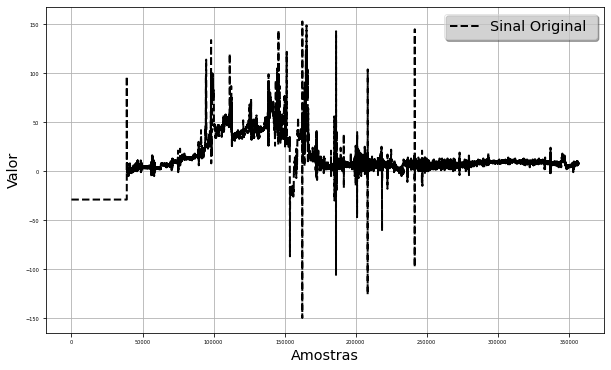

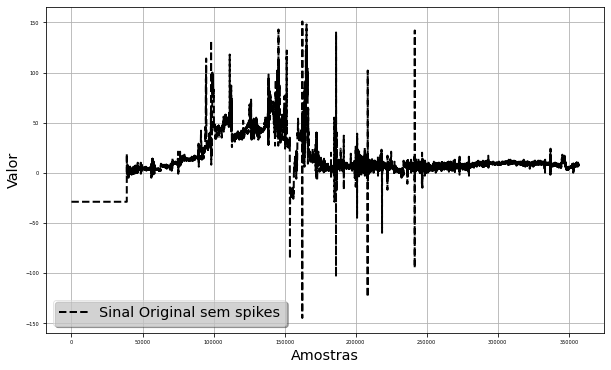

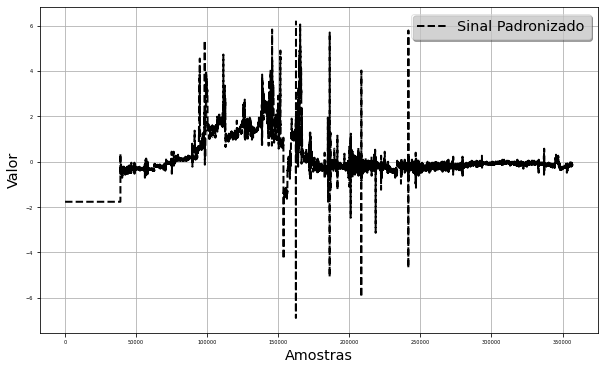

/usr/local/lib/python3.6/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:460: RuntimeWarning: divide by zero encountered in log2


[INFO] sampling images...
[INFO] loading pre-trained network...
[INFO] predicting...
+-----------------+---------------+--------------------------+---------------------------+
| Nome do Arquivo | Classificação | Comprimento Estimado(mm) | Profundidade Estimada(mm) |
+-----------------+---------------+--------------------------+---------------------------+
|      teste1     |     solda     |          116.44          |           16.33           |
|      teste2     |     squat     |          74.33           |            2.65           |
|      teste3     |     squat     |          108.0           |            4.63           |
|      teste4     |     solda     |          66.11           |           13.46           |
|      teste5     |     squat     |          124.78          |            2.98           |
|      teste6     |     solda     |          15.56           |           12.47           |
|      teste7     |     solda     |          45.78           |            4.58           |
|    

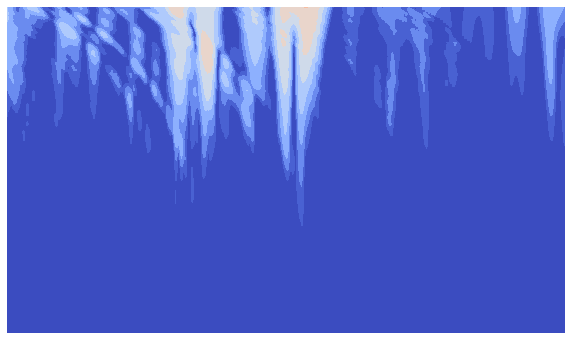

<Figure size 720x432 with 0 Axes>

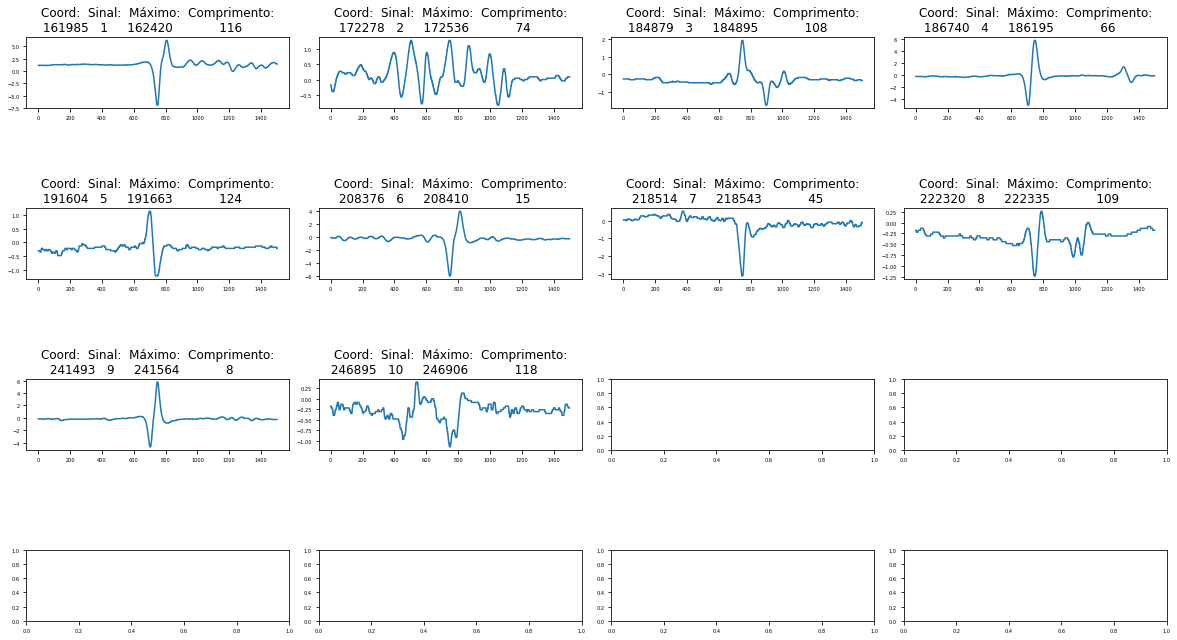

In [19]:
##############################################################################
# ## Instância da classe
##############################################################################
OperadorGPS               = ClasseGPS()


##############################################################################
## Configurar para armazenar figuras
##############################################################################
#CurrentDir = OperadorGPS.getCurrentDirectory();
#DirFigs    = OperadorPlote.criarPasta(CurrentDir, "Figuras")
#DirGPS     = OperadorGPS.criarPasta(CurrentDir, "Trajetoria")

#print("CurrentDir = ", CurrentDir)
#print("DirFigs = ", DirFigs)
#print("DirGPS = ", DirGPS)


#NumFig = 1;
#FigureName = "Figura_SVTS_Fig%d"
#FlagExportarFig = 1;         # se flag = 1 os plotes serão salvos em PNG e PFD
##############################################################################


##########################  Início   ##########################################

########################## Definição do caminho do arquivo ####################
Path = "/content/drive/My Drive/Projeto Eddy Current/Sinais_Coletados/Banco de Dados/Medidas_SVTS_GPS"
#Path_trajetoria = "/content/drive/My Drive/Projeto Eddy Current/Sinais_Coletados/Banco de Dados/Medidas_SVTS_GPS/gps"

File    = "Sonda_Lado_Direito_4_0.txt"
#FileGPS = "Sonda_Lado_Direito_4_GPS_tragetoria.txt"


#Path = "/content/drive/My Drive/Projeto Eddy Current/Sinais_Coletados/Banco de Dados/Medidas_SVTS_2/JI"

#File = "ji3_0.txt"


##############################################################################

#########################
# Definição de Variáveis#
#########################
wavelet = 0 # Se = 1 realiza a transformada wavelet
opcao=1  #1=sinal rodo  2=sinal manual
mediasup = 4.15 #0.55
mediainf = -6.15 #-0.35
zerocross = 2
tipo_de_grafico = 'flag'
familia=['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau8', 'shan', 'fbsp', 'cmor']
familia2=['cgau1','cgau2','cgau3','cgau4','cgau5','cgau6','cgau7','cgau8','cmor','fbsp','gaus1','gaus2','gaus3','gaus4','gaus5','gaus6','gaus7','gaus8','mexh','morl','shan']
nome_da_wavelet = familia2[8]
escalas = 50
cmap = 'coolwarm'
classLabels = ["cracking","junta","Solda", "squat"]
caminho_figuras = '/content/drive/My Drive/Projeto Eddy Current/ProjetoFinal/t_wavelet2'
caminho_modelo = '/content/drive/My Drive/Projeto Eddy Current/ProjetoFinal/modelo/4classes100Ev2.hdf5'
#gradiente =  29 # 1.45 #3 sd  #9 manual #1.45 rodo
#path ='C:/Projeto Eddy Current/Supervisionado/Sinais/teste/imagem'

######################
# Opções de aquisição#
######################

if opcao == 1: # RODO 

    limite = 1 #4 #threshold superior
    limite2 = -200 #threshold inferior
    delay=800 #% RODO
    amostras=1499 # RODO
    const=20 # RODO
    gradiente = 1
    

if opcao == 2:# MANUAL 
   
    limite = 0.4#2 #1.8 #4 #0.7 (Junta) #threshold superior #0.7
    limite2 = -200 #threshold inferior
    delay=3500 #500 #250(Junta)Rodo # manual 40
    amostras=9999#7999 #2499 #799(Junta) #Rodo # manual 399
    const=20 #Rodo
    gradiente = 1

#######################################################################


####################  Leitura do Arquivo ##############################
### Cria Operador Arquivo
OperadorArquivos = carrega_arquivo()
### Recebe o arquivo lido
sinal=OperadorArquivos.le_arquivo(Path,File)

#x1=list(range(1,(len(sinal)+1)))


#####################  Filtra Spikes ###################################
### Cria Operador Filtro
OperadorFiltro=filtro()
### Recebe o arquivo sem spikes
resultado=OperadorFiltro.tira_spikes(sinal)

##################### Padroniza Sinal ###################################
### Cria Operador Padroniza Sinal
OperadorPadroniza = padroniza_sinal()
### Recebe o arquivo do sinal padronizado
sinalpadrao=OperadorPadroniza.padroniza(resultado) 


###################### Plota Sinal Principal ############################
### Cria Operador Plota Sinal
OperadorPlota = ClassePlote()
### Plota gráfico
OperadorPlota.ploteY(sinal,'Amostras','Valor','Sinal Original ')
OperadorPlota.ploteY(resultado,'Amostras','Valor','Sinal Original sem spikes')
OperadorPlota.ploteY(sinalpadrao,'Amostras','Valor','Sinal Padronizado')


####################### Destaca Sinais ###################################
### Cria Operador Threshold
OperadorThreshold = Ident_thres()
janela=OperadorThreshold.threshold_sinal(opcao,amostras,sinalpadrao,limite)

### Cria Operador Sinal
OperadorSinal=sinais()
### Destaca Sinais
(sinalf,janela2,picos)=OperadorSinal.destaca_sinais(janela,amostras,sinalpadrao)


###################### Filtra Sinal #########################################
### Filtro Média
(sinalfinal,janela4,picos4)=OperadorFiltro.filtro_media(sinalf,picos,janela2,mediainf,mediasup)
### Filtro FFT
(sinalfinal2,janela5,picos5)=OperadorFiltro.filtro_fft(sinalfinal,picos4,janela4)
### Filtro ZeroCross
(sinalfinal3,picos6,janela6)=OperadorFiltro.filtro_zerocross(sinalfinal2,picos5,janela5,zerocross)
### Filtro Gradiente
(sinalfinal4,picos7,janela7)=OperadorFiltro.filtro_gradiente(sinalfinal3,picos6,janela6,gradiente)


###################### Mede Sinal ############################################
### Cria Operador mede Sinal
Operador_mede_sinal=mede_comprimento()
### Mede Sinal
(sinalmedido,comprimento,profundidade)=Operador_mede_sinal.comprimento_sinal(sinalfinal4)





##################### Executa a transformada Wavelet ########################
### Cria Operador Wavelet
Operador_wavelet=transf_wavelet()
################# Faz a Transformada Wavelet do Sinal e Grava 
Operador_wavelet.wavelet_sinal(nome_da_wavelet,escalas,cmap,amostras,caminho_figuras,sinalfinal4)


###################### Plota Sinal ###########################################
### Plota Sinais Filtrados
OperadorPlota.plotar_sinais_filtrados(sinalfinal4,comprimento,picos7,janela7)


################## Faz a classificação das categorias  ################
### Cria Operador Modelo CNN
Operador_cnn=modelo_cnn()
### Faz a Classificação dos Sinais 
(nome,predicao)=Operador_cnn.classifica_sinais (classLabels,caminho_figuras,caminho_modelo)


################### Plota Tabela resumo dos sinais classificados  ############
### Cria Operador Tabela
Operador_tabela=tabela()
### Faz a Tabela
Operador_tabela.constroe_tabela (nome,predicao,comprimento,profundidade)






In [20]:
##############################################################################
# ## Instância da classe
##############################################################################
OperadorGPS               = ClasseGPS()


# ##############################################################################
# ## Carregar arquivos
# ##############################################################################
Path_sinal      = "/content/drive/My Drive/Projeto Eddy Current/Sinais_Coletados/Banco de Dados/Medidas_SVTS_GPS"
Path_trajetoria = "/content/drive/My Drive/Projeto Eddy Current/Sinais_Coletados/Banco de Dados/Medidas_SVTS_GPS/gps"

File    = "Sonda_Lado_Direito_4_0.txt"
FileGPS = "Sonda_Lado_Direito_4_GPS_tragetoria.txt"
Coluna  = 2;

# # carrega vetor coluna com dados do eddy current
Sinal = OperadorGPS.openFileColumn(Path_sinal, File, " ", Coluna)
size  = OperadorGPS.getSize(Sinal)
SizeEddyCurrentdata = size[1];

# # Carrega a matriz com os dados da trajetoria do GPS
TrajetoriaGPS = OperadorGPS.openFile(Path_trajetoria, FileGPS, " ")
size = OperadorGPS.getSize(TrajetoriaGPS)
SizeGPSdata = size[1];


##############################################################################
## Obter indices do arquivo de trajetória do GPS
##############################################################################
#print("\n================================================================")
#TrajetoriaGPS = [[1, 4, 5, 12], 
#                [-5, 1, 6, 0],
#                [1, 2, 9, 4],
#                [-5, 8, 3, 0],
#                [-6, 7, 11, 19]]

#print(TrajetoriaGPS)


#print("\n================================================================")
##############################################################################
#SizeGPSdata         = 5;      # quantidade de dados do arquivo de trajetoria
#SizeEddyCurrentdata = 20;     # quantidade de dados do sinal do Eddy Current
#iDthreshol = [1,4,8];         # índices contendos as posíçoes onde foram identificados os threshold

iDthreshol = picos7

Falha_iD = OperadorGPS.getIndiceGPSTrajetoria(SizeEddyCurrentdata, SizeGPSdata, iDthreshol)

## O arquivo de Falha do GPS será formado pelas linhas obtidas na função getIndiceGPSTrajetoria
print("\n================================================================")
print("Posições no arquivo de trajetoria do GPS = ", Falha_iD)

## obtendo arquivo de Falha do GPS
print("\n================================================================")
FalhaTrajetoriaGPS = OperadorGPS.getArquivoFalhaGPS(TrajetoriaGPS, Falha_iD)
print(FalhaTrajetoriaGPS)


##############################################################################
## Configurar para armazenar GPSfalhas
##############################################################################
CurrentDir = OperadorGPS.getCurrentDirectory();
DirGPS     = OperadorGPS.criarPasta(CurrentDir, "Trajetoria")
print("\nCurrentDir = ", CurrentDir)
print("DirGPS = ", DirGPS)


OperadorGPS.writeFileTXT(FalhaTrajetoriaGPS, DirGPS, "GPSfalhas.txt", " ");


##############################################################################
## Obter lista de arquivos TXT
##############################################################################
ListaArquivos = OperadorGPS.getListaArquivos(DirGPS, "txt")


getSize = 356919 x 3
getSize = 1 x 356919
Erro no metodo openFile: na Linha 65
could not convert string to float: '-21.73291671\t-43.39454332\t0\t0\n'
Erro no metodo getSize: na Linha 173
'NoneType' object is not subscriptable


TypeError: ignored

/content/drive/My Drive/Projeto Eddy Current/Arquivos Tiago

Pasta já existente ou diretório errado!
/content/drive/My Drive/Projeto Eddy Current/Arquivos Tiago/Figuras
CurrentDir =  /content/drive/My Drive/Projeto Eddy Current/Arquivos Tiago
DirFigs =  /content/drive/My Drive/Projeto Eddy Current/Arquivos Tiago/Figuras


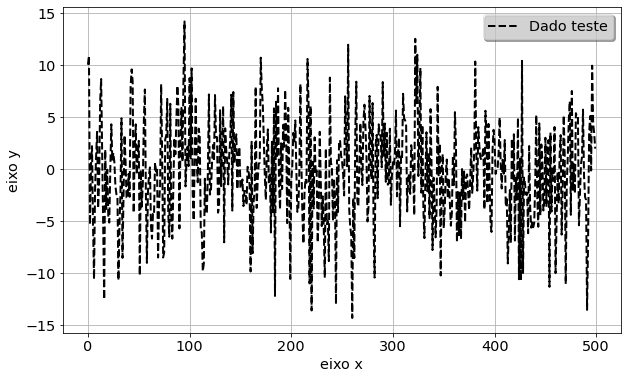

Figura_SVTS_Fig1
Figura salva em:  /content/drive/My Drive/Projeto Eddy Current/Arquivos Tiago/Figuras/Figura_SVTS_Fig1


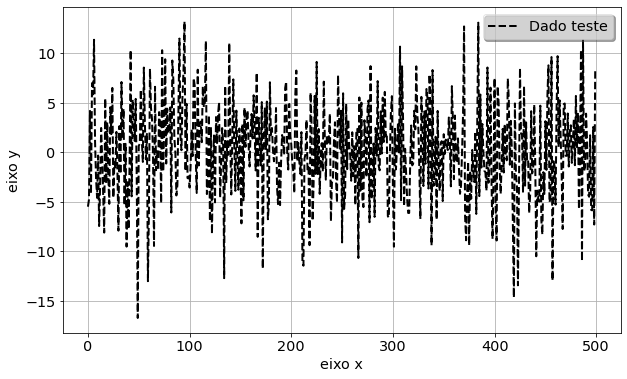

Figura_SVTS_Fig2
Figura salva em:  /content/drive/My Drive/Projeto Eddy Current/Arquivos Tiago/Figuras/Figura_SVTS_Fig2


In [ ]:
##############################################################################
# ## Instância da classe
##############################################################################
OperadorPlote  = ClassePlote()


##############################################################################
## Configurar para armazenar figuras
##############################################################################
CurrentDir = OperadorGPS.getCurrentDirectory();
DirFigs    = OperadorPlote.criarPasta(CurrentDir, "Figuras")


print("CurrentDir = ", CurrentDir)
print("DirFigs = ", DirFigs)


NumFig = 1;
FigureName = "Figura_SVTS_Fig%d"
FlagExportarFig = 1;         # se flag = 1 os plotes serão salvos em PNG e PFD
##############################################################################

vetor = OperadorPlote.getRandomVector(500, 0, 5);

OperadorPlote.ploteY(vetor, "eixo x", "eixo y", "Dado teste")
# Salvar Figuras
print((FigureName % (NumFig)))
OperadorPlote.savePlot(FlagExportarFig, DirFigs, (FigureName % (NumFig))); NumFig +=1;



vetor = OperadorPlote.getRandomVector(500, 0, 5);

OperadorPlote.ploteY(vetor, "eixo x", "eixo y", "Dado teste")
# Salvar Figuras
print((FigureName % (NumFig)))
OperadorPlote.savePlot(FlagExportarFig, DirFigs, (FigureName % (NumFig))); NumFig +=1;







In [24]:
type(size)

NoneType

# Processar Sinal SVTS

## Gerar Relatorio GPS